### New loading scripts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scoring_main_path   = '/vol/sleepstudy/datasets/mesa/scorings/'
scorings_nsrr       = scoring_main_path + 'nsrr/'
scorings_somnolyzer = scoring_main_path + 'somnolyzer/'

In [3]:
def show_comp(mesa_id):
    hypnogram_nsrr = pd.read_csv(scorings_nsrr + f'hypnogram/hypnogram-{mesa_id:04}.csv')['0']
    events_nsrr    = pd.read_csv(scorings_nsrr + f'events/events-{mesa_id:04}.csv')
    hypnogram_somnolyzer = pd.read_csv(scorings_somnolyzer + f'hypnogram/hypnogram-{mesa_id:04}.csv')['0']
    events_somnolyzer    = pd.read_csv(scorings_somnolyzer + f'events/events-{mesa_id:04}.csv')

    _, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

    hypnogram_nsrr.plot(ax=axs[0])
    events_nsrr[['OSA', 'CSA', 'HYP']].plot(ax=axs[1])
    hypnogram_somnolyzer.plot(ax=axs[2])
    events_somnolyzer[['OSA', 'CSA', 'HYP']].plot(ax=axs[3])
    axs[0].legend(['[NSRR] Hypnogram'], loc='upper right')
    axs[2].legend(['[Somnolyzer] Hypnogram'], loc='upper right')

    plt.tight_layout()
    plt.show()

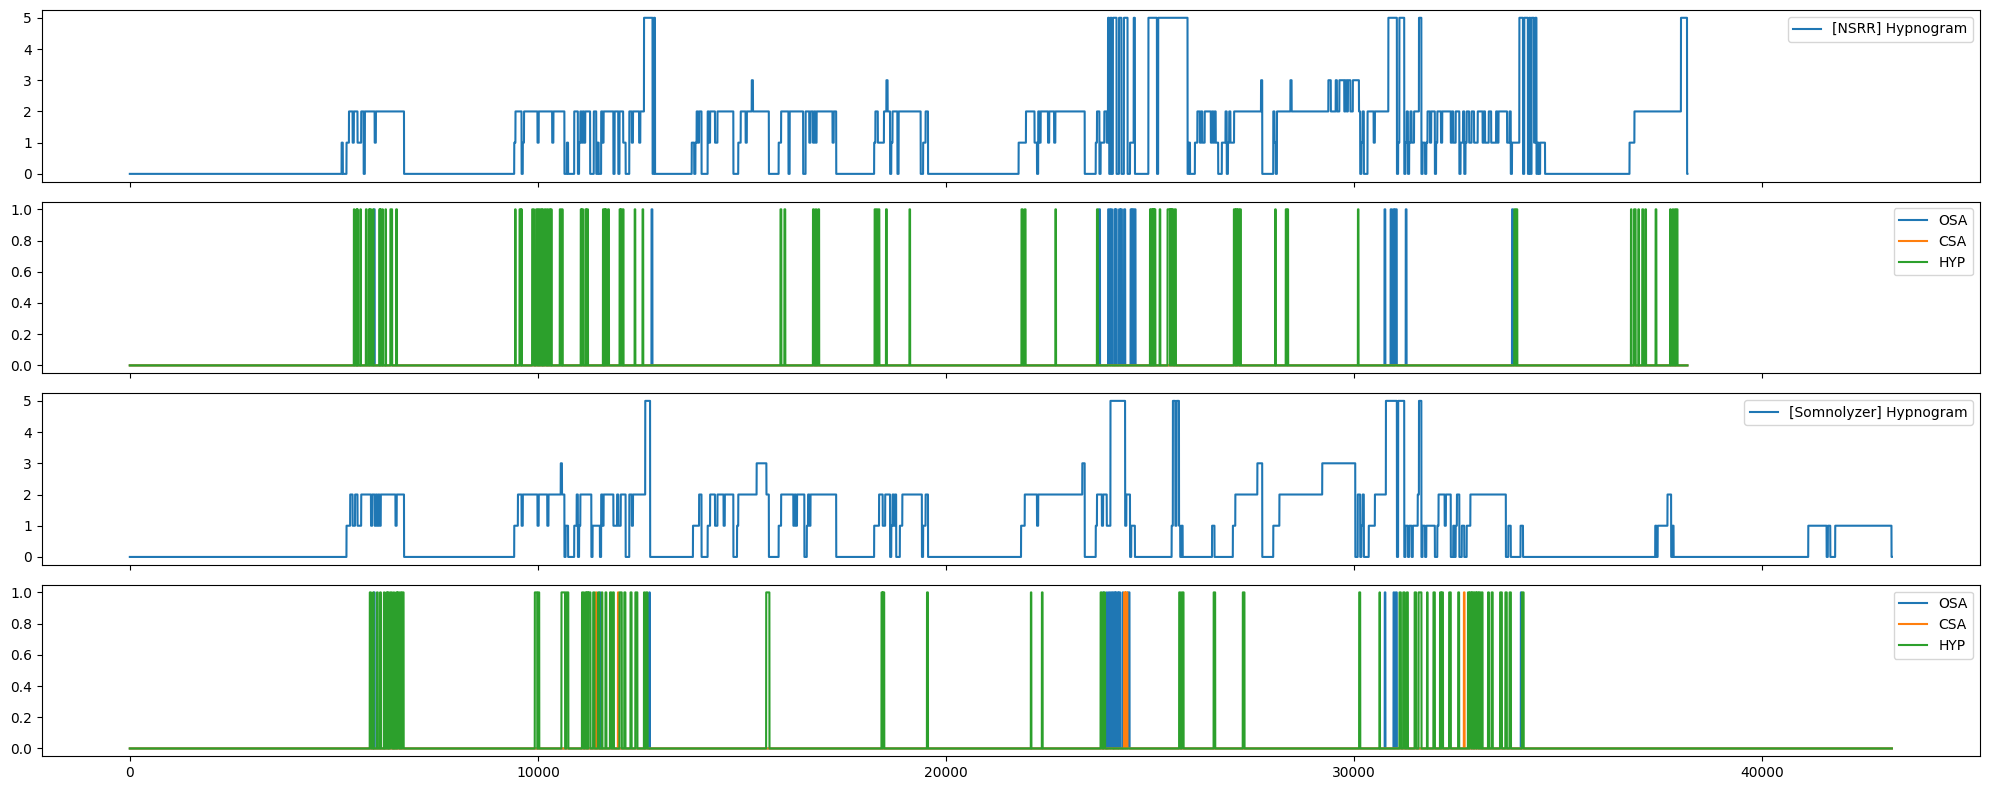

In [4]:
show_comp(1)

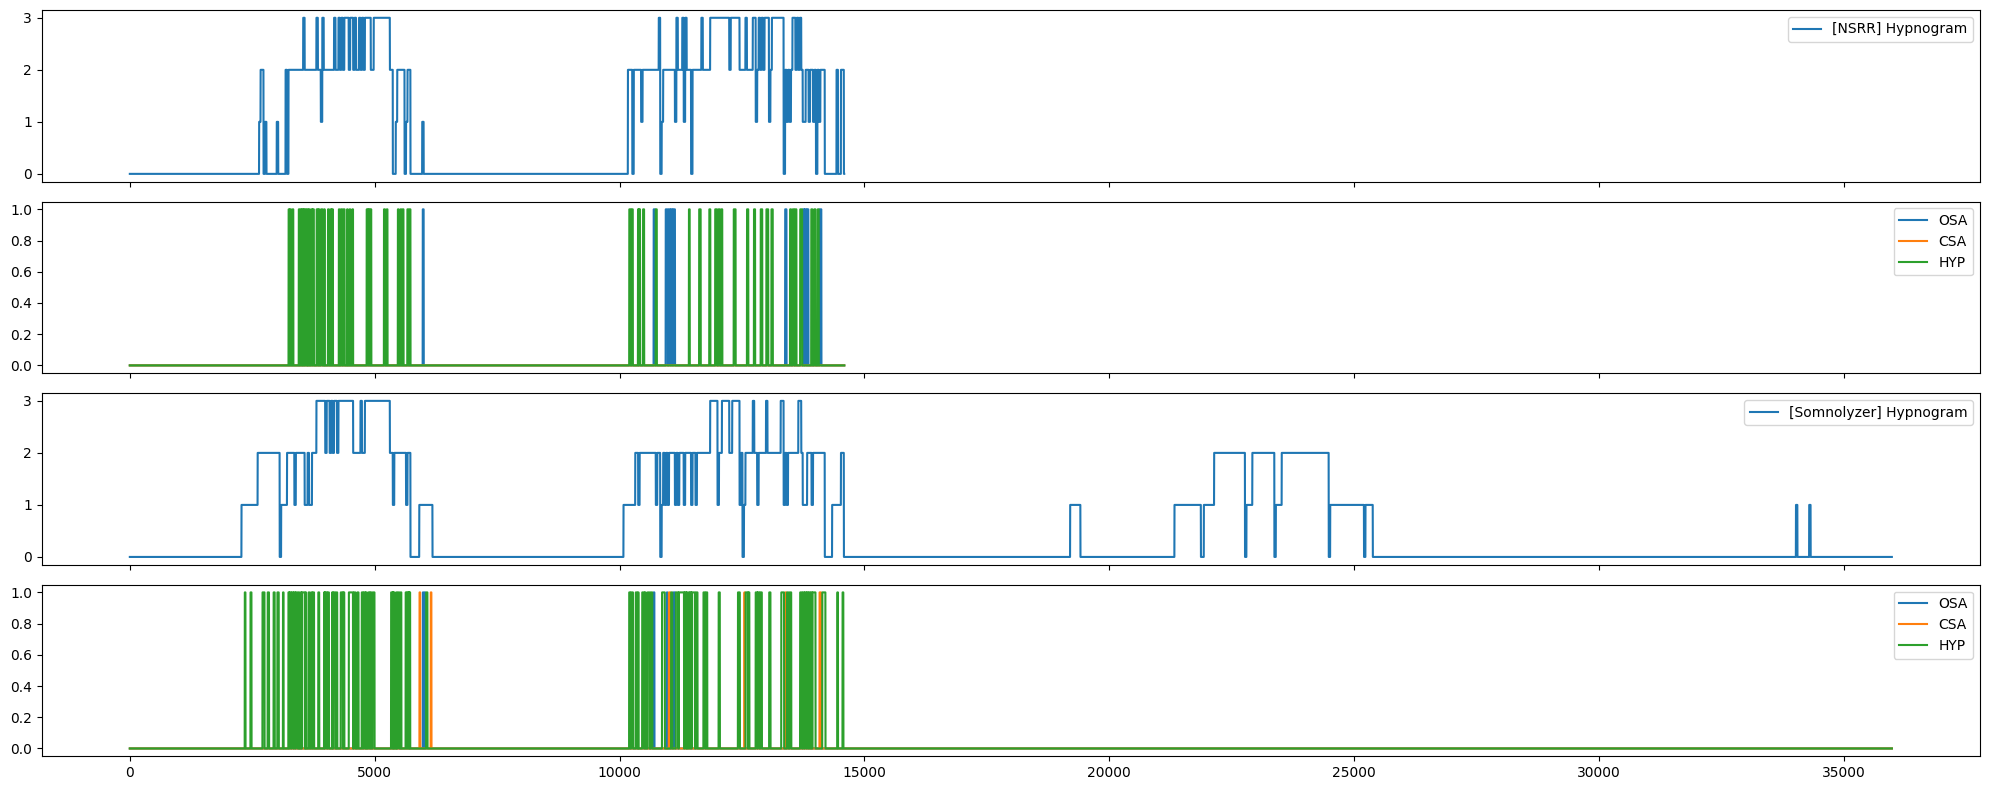

In [5]:
show_comp(10)

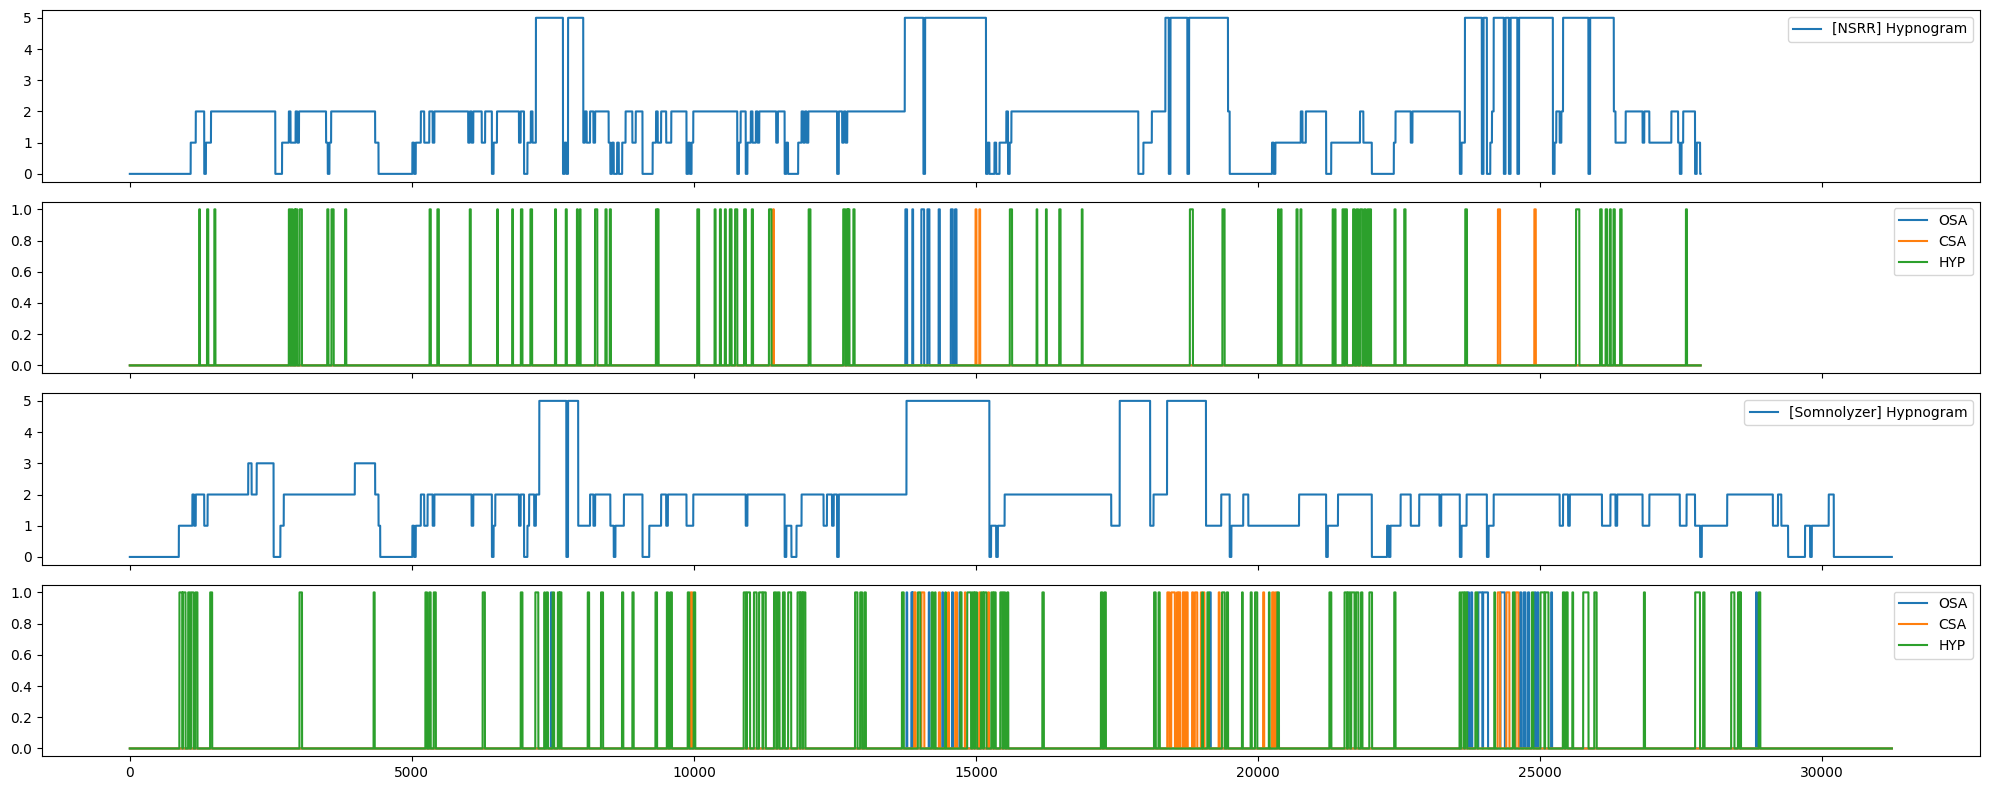

In [6]:
show_comp(301)

### Recording

In [2]:
from wearsed.dataset.Recording import Recording

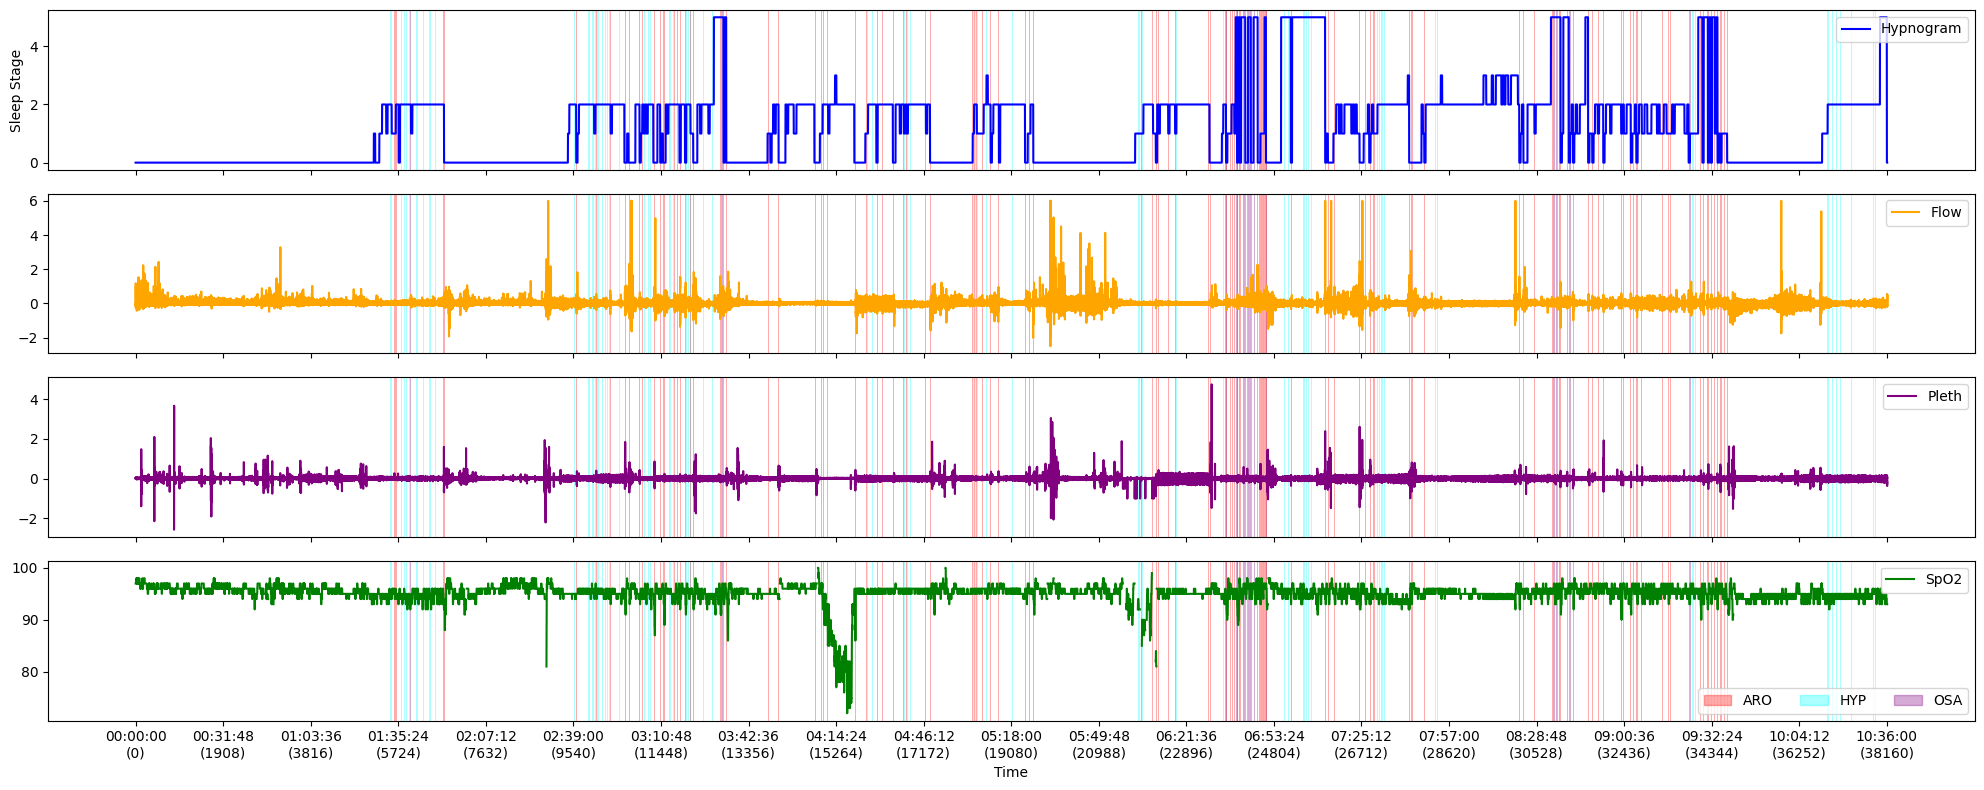

In [3]:
r1_nsrr = Recording(1, scoring_from='nsrr', events_as_list=True, signals_to_read=['Flow', 'Pleth', 'SpO2'])
r1_nsrr.look_at()

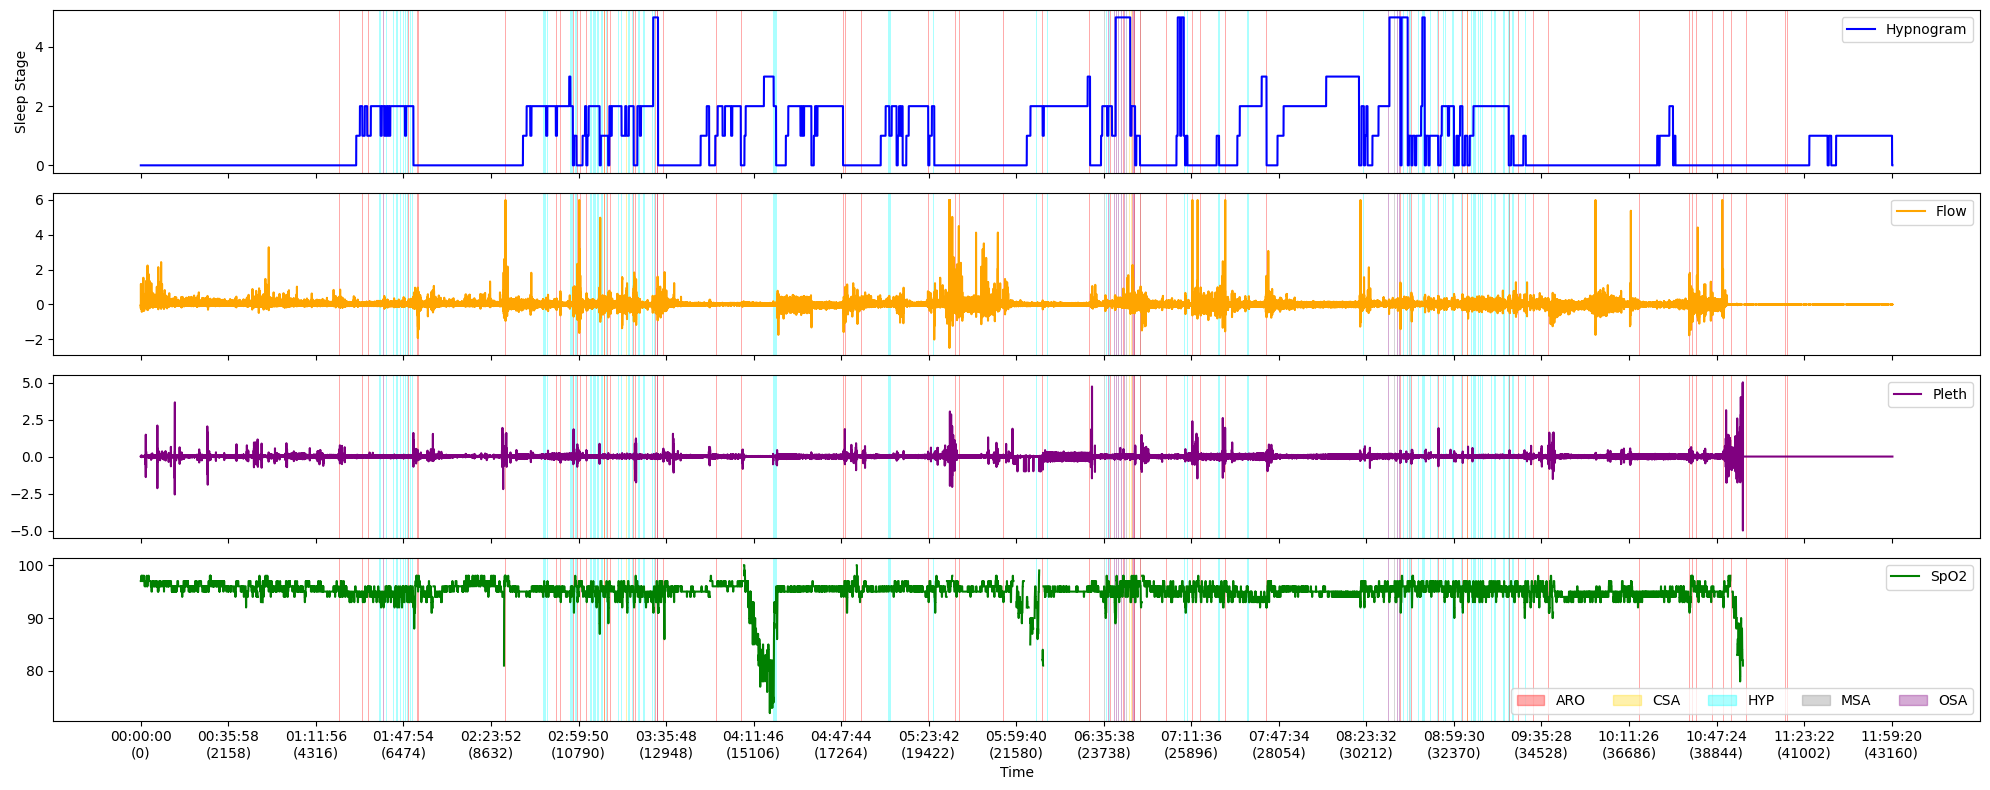

In [4]:
r1_somnolyzer = Recording(1, scoring_from='somnolyzer', events_as_list=True, signals_to_read=['Flow', 'Pleth', 'SpO2'])
r1_somnolyzer.look_at()

In [20]:
[str(ev) for ev in r1_somnolyzer.get_events(['CSA', 'OSA'])]

['[01:39:40, 01:39:58] OSA',
 '[03:10:18, 03:10:32] CSA',
 '[03:11:55, 03:12:07] OSA',
 '[03:19:20, 03:19:34] CSA',
 '[03:32:10, 03:32:20] OSA',
 '[06:37:29, 06:37:41] OSA',
 '[06:38:56, 06:39:06] OSA',
 '[06:39:41, 06:40:14] OSA',
 '[06:40:43, 06:41:12] OSA',
 '[06:41:38, 06:41:48] OSA',
 '[06:42:12, 06:42:26] OSA',
 '[06:42:43, 06:43:03] OSA',
 '[06:43:33, 06:43:44] OSA',
 '[06:44:01, 06:44:27] OSA',
 '[06:45:27, 06:45:40] OSA',
 '[06:46:02, 06:46:32] CSA',
 '[06:46:46, 06:47:23] CSA',
 '[06:47:32, 06:48:16] OSA',
 '[08:32:31, 08:32:46] OSA',
 '[08:36:06, 08:36:24] OSA',
 '[08:36:58, 08:37:26] OSA',
 '[09:04:50, 09:05:06] CSA',
 '[09:28:05, 09:28:20] OSA']

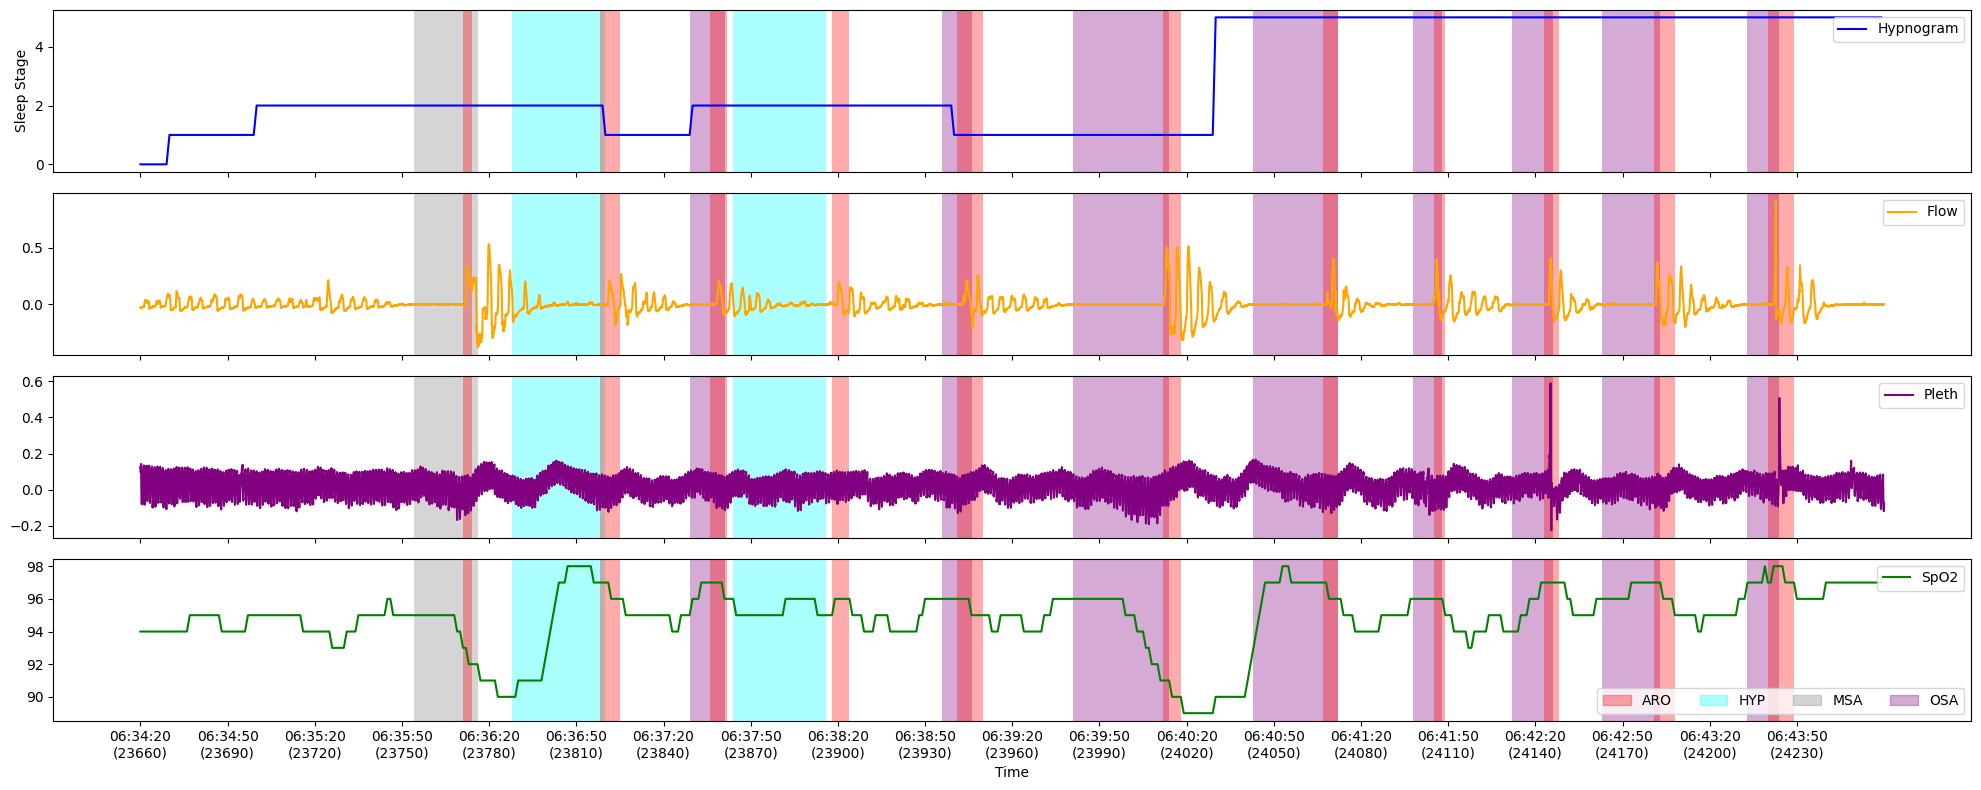

In [5]:
r1_somnolyzer.look_at(time='06:39:20', window_size='00:05:00')

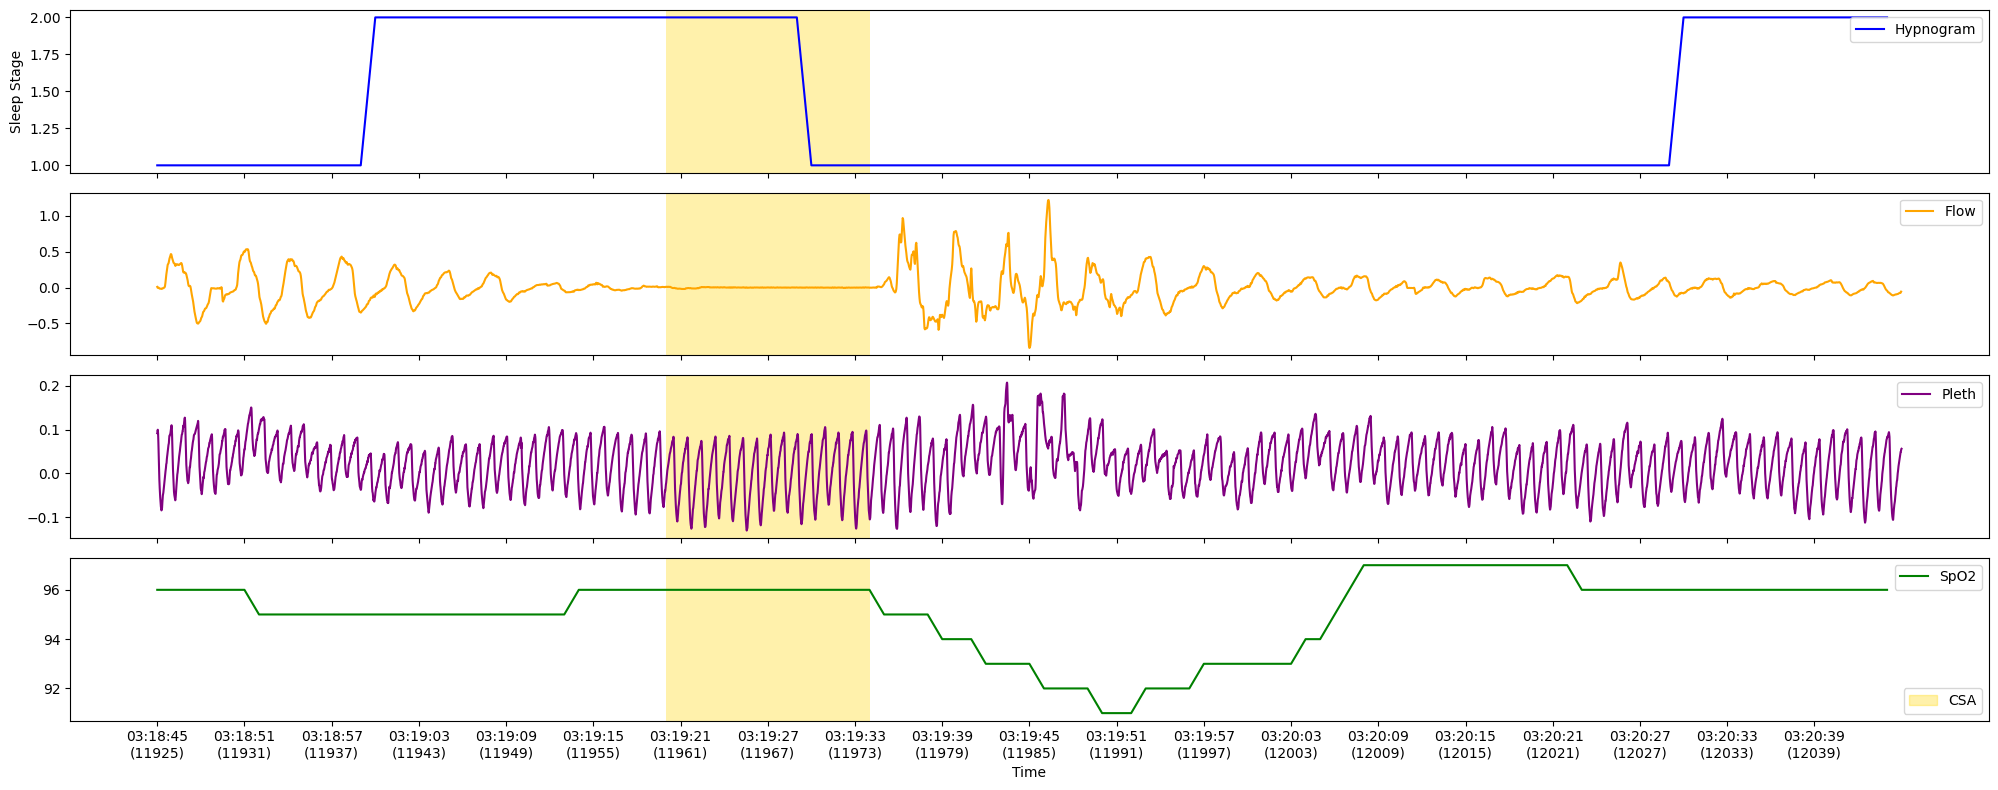

In [6]:
r1_somnolyzer.look_at(time='03:19:45', window_size='00:01:00', events=['OSA', 'CSA'])

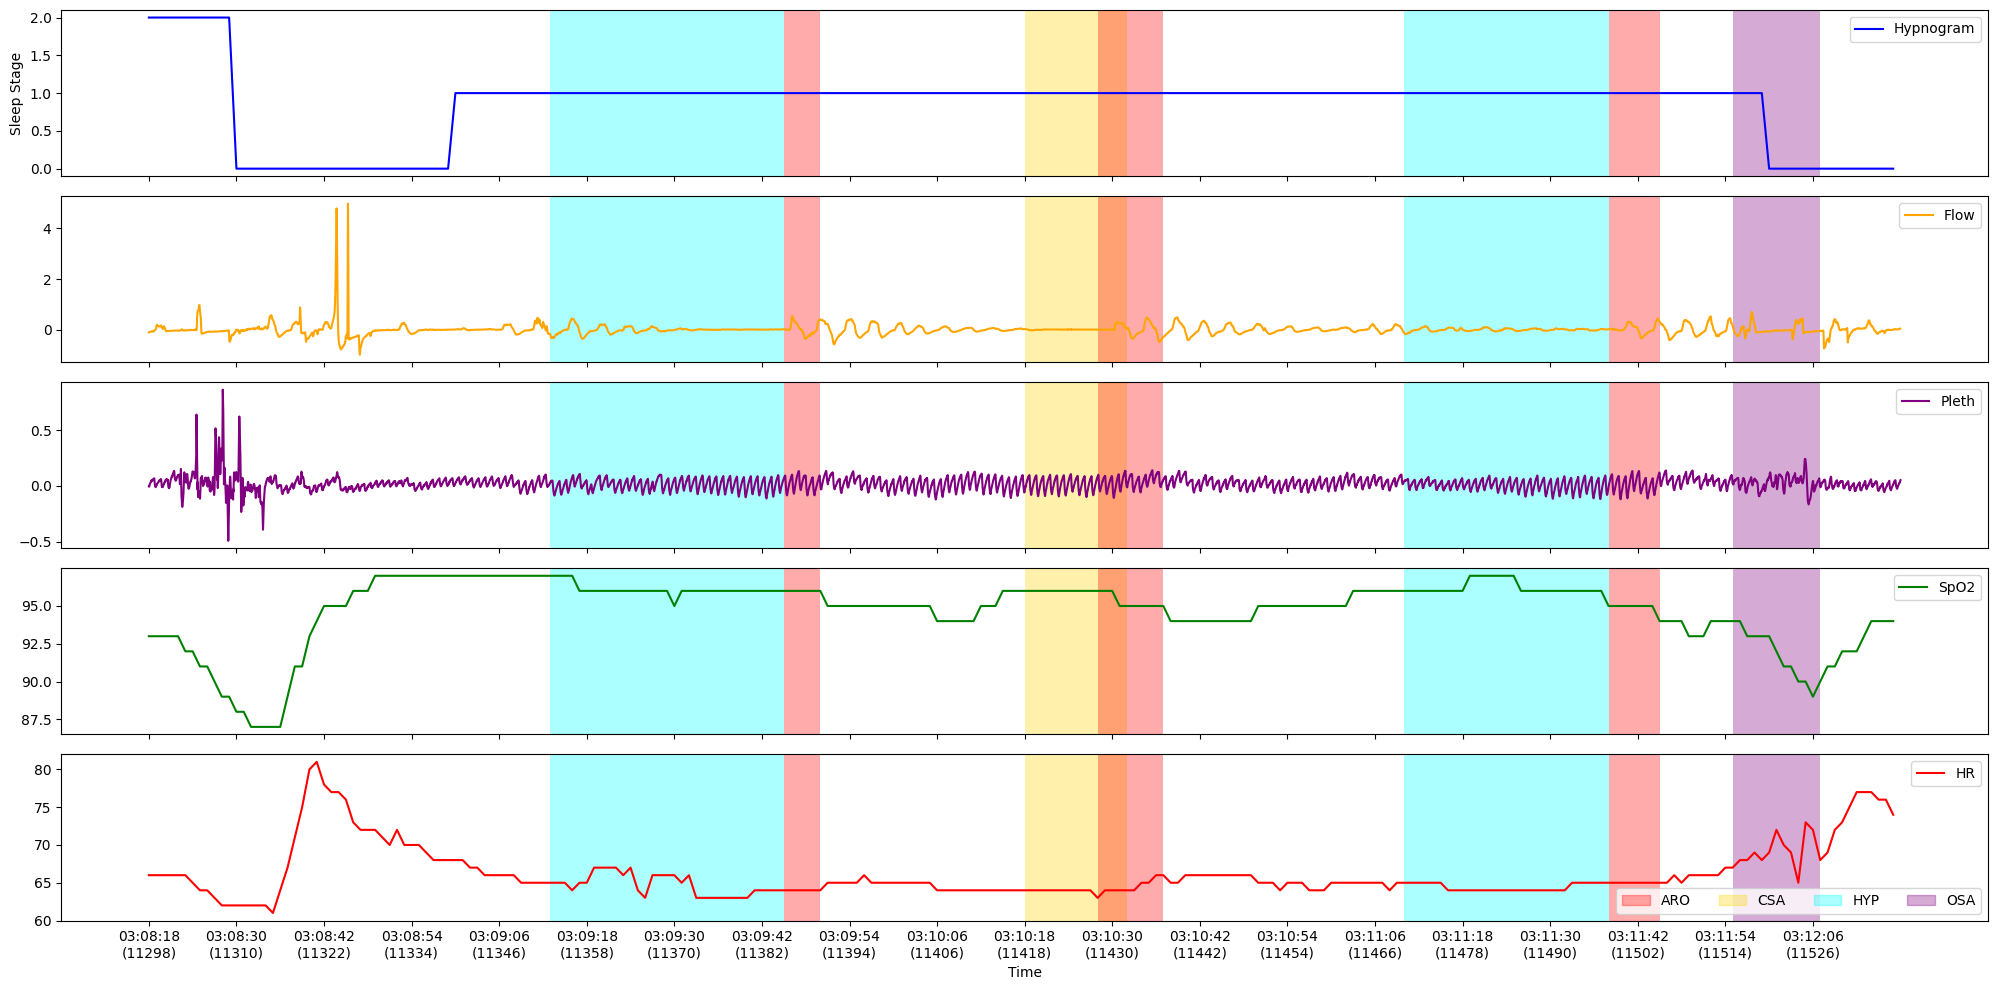

In [22]:
r1_somnolyzer.look_at(time='03:10:18', window_size='00:02:00')

### Dataset

In [10]:
from wearsed.dataset.WearSEDDataset import WearSEDDataset
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = WearSEDDataset(mesaid_path='../wearsed/dataset/data_ids/', scoring_from='somnolyzer', signals_to_read=['SpO2', 'Pleth'], return_recording=False)

In [12]:
signals, labels = dataset[0]
print(signals.shape)
sig_hyp, sig_spo2, sig_pth = signals[0], signals[1], signals[2:].view(-1)
print(sig_hyp.shape, sig_spo2.shape, sig_pth.shape)

AttributeError: 'tuple' object has no attribute 'shape'

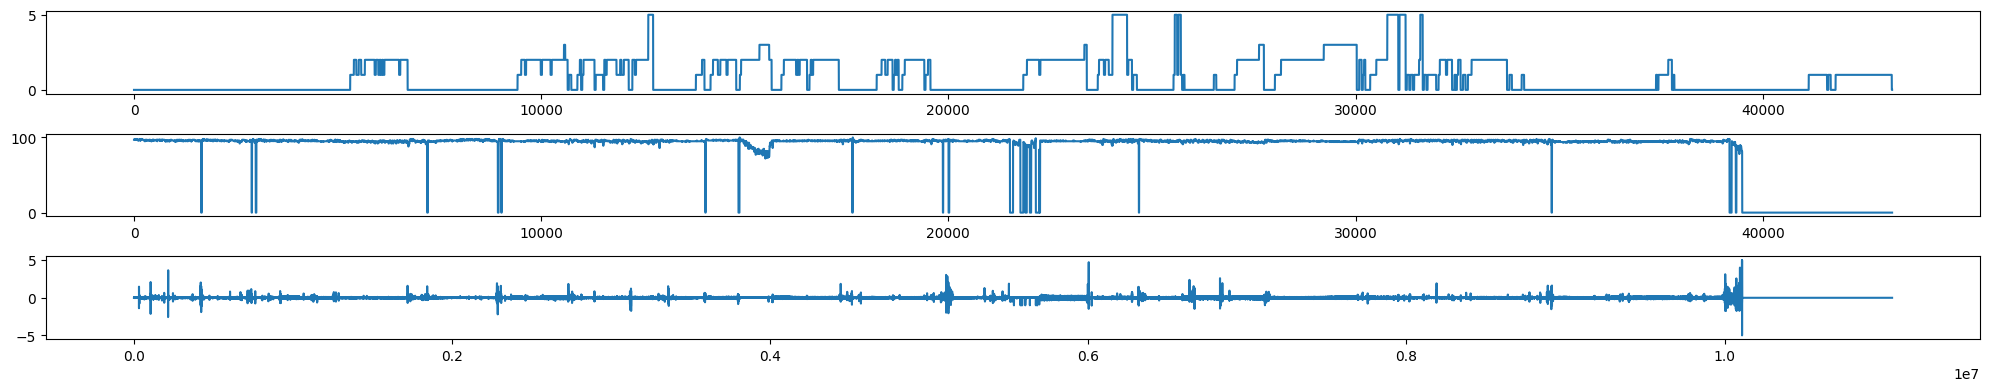

In [ ]:
_, axs = plt.subplots(3, 1, figsize=(20, 9))

pd.Series(sig_hyp).plot(figsize=(20, 4), ax=axs[0])
pd.Series(sig_spo2).plot(figsize=(20, 4), ax=axs[1])
pd.Series(sig_pth).plot(figsize=(20, 4), ax=axs[2])

plt.tight_layout()
plt.show()